In [2]:
import pandas as pd
import numpy as np
from Datapreprocessing import DataProcessor, ExploratoryDataAnalysis
from matplotlib import pyplot as plt
%load_ext autoreload
%autoreload 2

## Read in and preprocess the data

In [3]:
train_folder = 'train_tsv1'
test_folder = 'test_tsv1'
train_metadata_path = 'metadata/training_metadata.csv'
test_metadata_path = 'metadata/test_metadata.csv'

In [4]:
processor = DataProcessor(train_folder, test_folder, train_metadata_path, test_metadata_path)
train_data, test_data = processor.prepare_datasets()

In [5]:
train_data.head()

,participant_id,correlation_id,correlation_value,age,sex,study_site,bmi,ethnicity,race,handedness,parent_1_education,parent_2_education,p_factor_fs,internalizing_fs,externalizing_fs,attention_fs
0,NDAREE015WGU,corr_1,0.074628,13.35,Female,HBNsiteCBIC,19.1,Not_Hispanic_or_Latino,Other,Right,Complete_tertiary,Complete_tertiary,0.59,-0.15,0.29,-1.6
1,NDAREE015WGU,corr_2,0.673757,13.35,Female,HBNsiteCBIC,19.1,Not_Hispanic_or_Latino,Other,Right,Complete_tertiary,Complete_tertiary,0.59,-0.15,0.29,-1.6
2,NDAREE015WGU,corr_3,0.813541,13.35,Female,HBNsiteCBIC,19.1,Not_Hispanic_or_Latino,Other,Right,Complete_tertiary,Complete_tertiary,0.59,-0.15,0.29,-1.6
3,NDAREE015WGU,corr_4,0.725489,13.35,Female,HBNsiteCBIC,19.1,Not_Hispanic_or_Latino,Other,Right,Complete_tertiary,Complete_tertiary,0.59,-0.15,0.29,-1.6
4,NDAREE015WGU,corr_5,0.823861,13.35,Female,HBNsiteCBIC,19.1,Not_Hispanic_or_Latino,Other,Right,Complete_tertiary,Complete_tertiary,0.59,-0.15,0.29,-1.6


In [6]:
train_data.shape

(21969600, 16)

In [7]:
test_data.shape

(9432600, 15)

In [8]:
# train_data.to_csv('train_data.csv', index=False)
# test_data.to_csv('test_data.csv', index=False)

## EDA and Missing Values

In [9]:
na_counts = processor.train_data.isna().sum()
columns_with_na = na_counts[na_counts > 0]
print(columns_with_na)

bmi                    358200
ethnicity             2169100
race                  3343200
parent_1_education    3641700
parent_2_education     437800
dtype: int64


In [10]:
processor.train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21969600 entries, 0 to 21969599
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   participant_id      object 
 1   correlation_id      object 
 2   correlation_value   float64
 3   age                 float64
 4   sex                 object 
 5   study_site          object 
 6   bmi                 float64
 7   ethnicity           object 
 8   race                object 
 9   handedness          object 
 10  parent_1_education  object 
 11  parent_2_education  object 
 12  p_factor_fs         float64
 13  internalizing_fs    float64
 14  externalizing_fs    float64
 15  attention_fs        float64
dtypes: float64(7), object(9)
memory usage: 2.6+ GB


In [11]:
# Check for the 8 object columns
object_columns = processor.train_data.select_dtypes(include=['object']).columns
print("Object columns in the training data:")
for col in object_columns:
    print(f" - {col}")

Object columns in the training data:
 - participant_id
 - correlation_id
 - sex
 - study_site
 - ethnicity
 - race
 - handedness
 - parent_1_education
 - parent_2_education


In [12]:
eda = ExploratoryDataAnalysis(dataframe=processor.train_data)
eda.basic_stats()

Dataset contains 1104 unique participants with 21969600 total observations
Basic Statistics:

Correlation Values Statistics:
count    2.196960e+07
mean     2.232739e-02
std      2.501904e-01
min     -8.720615e-01
25%     -1.545522e-01
50%      2.323657e-03
75%      1.792724e-01
max      9.620405e-01
Name: correlation_value, dtype: float64

Demographic Variables Statistics (Participant Level):
                   count       mean       std    min      25%     50%  \
age               1104.0  11.190634  3.234936   5.05   8.6550  10.585   
bmi               1086.0  19.835580  4.956126  12.60  16.2700  18.565   
p_factor_fs       1104.0   0.218623  1.002518  -1.61  -0.5400   0.215   
internalizing_fs  1104.0   0.103197  1.016288  -2.26  -0.7400   0.070   
externalizing_fs  1104.0   0.094810  1.070137  -2.15  -0.6300  -0.240   
attention_fs      1104.0   0.079158  0.994986  -3.18  -0.6025   0.090   

                      75%    max  
age               13.5125  21.90  
bmi               22.1

Missing Values Analysis:
Missing correlation values: 0 (0.00%)

Missing Values in Demographic Data (Participant Level):
                    Missing Values  Percentage (%)
bmi                             18        1.630435
ethnicity                      109        9.873188
race                           168       15.217391
parent_1_education             183       16.576087
parent_2_education              22        1.992754


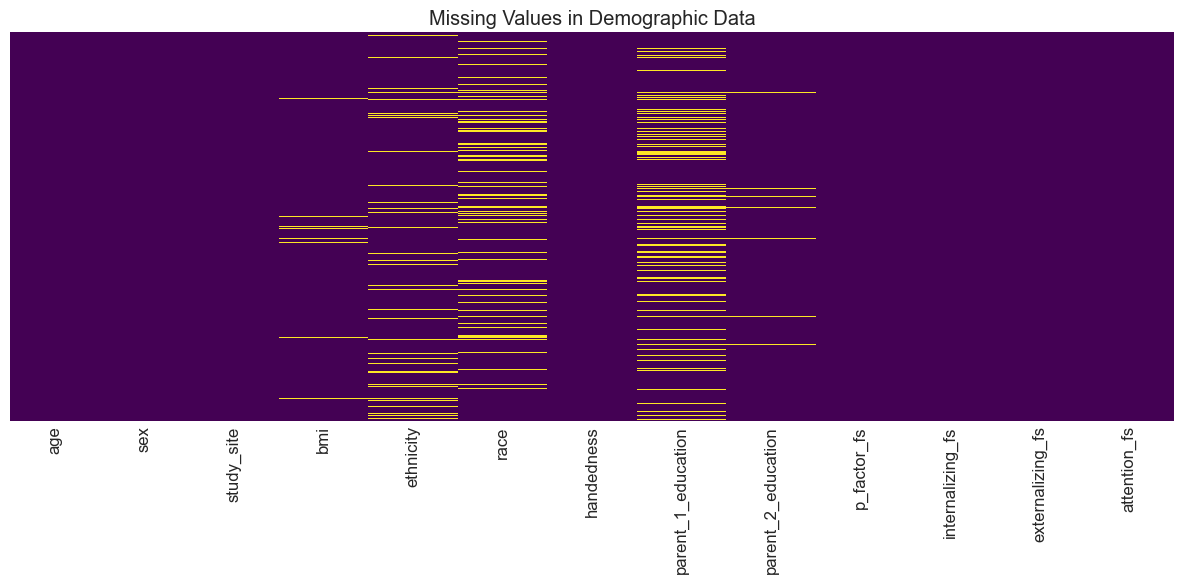

In [14]:
eda.missing_values_analysis()

Correlation Values Distribution:


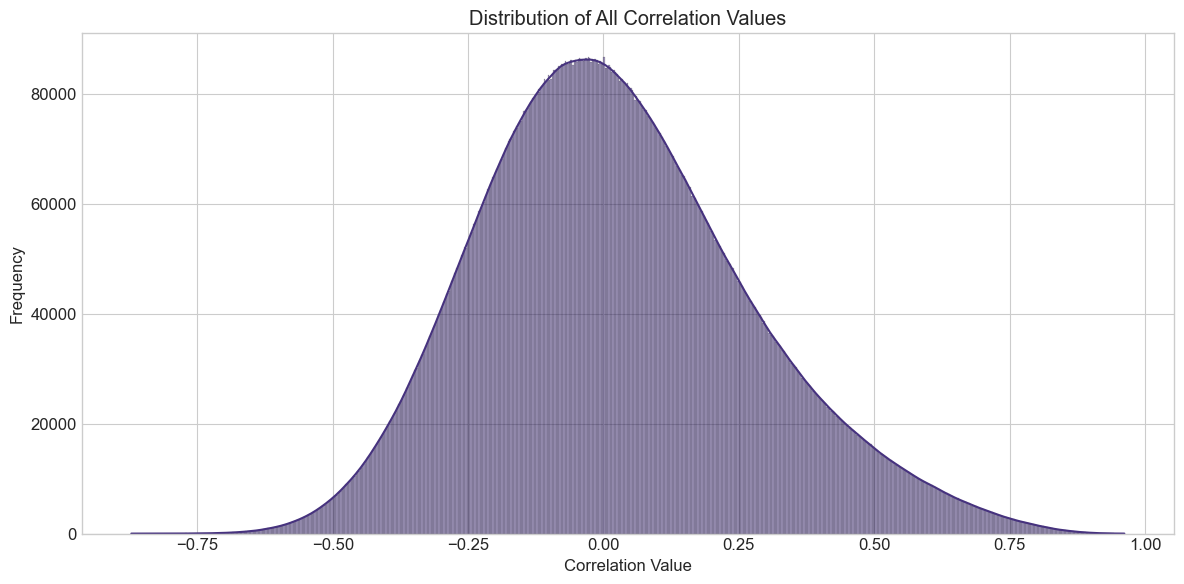


Distribution Statistics for Correlation Values:
count    2.196960e+07
mean     2.232739e-02
std      2.501904e-01
min     -8.720615e-01
25%     -1.545522e-01
50%      2.323657e-03
75%      1.792724e-01
max      9.620405e-01
Name: correlation_value, dtype: float64

Potential outliers: 195504 values outside of range [-0.655, 0.680]


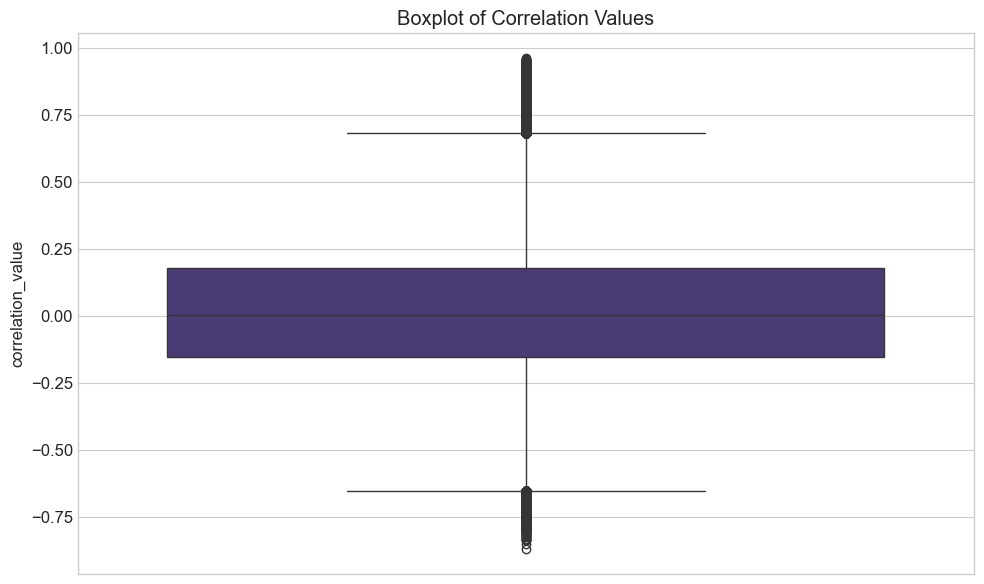

In [15]:
eda.correlation_distribution()

Participant-Level Analysis:


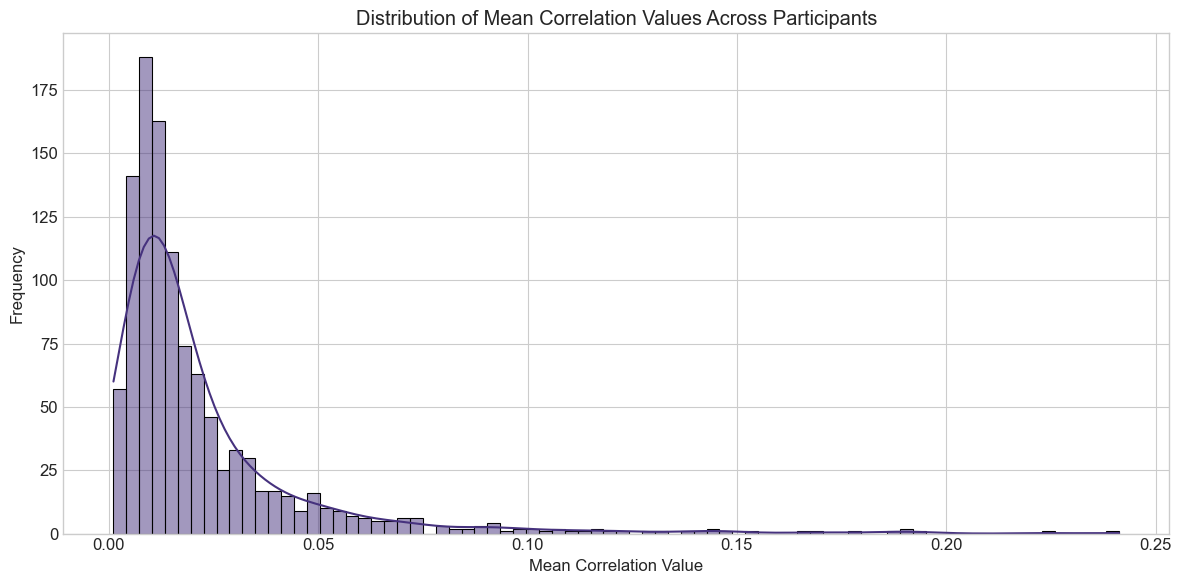

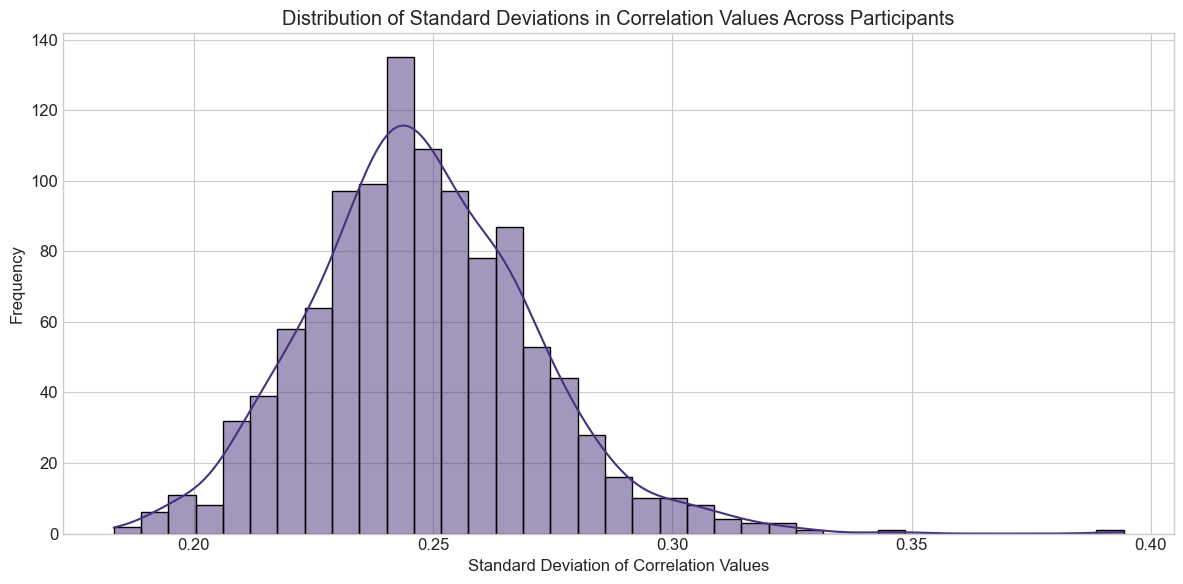

In [18]:
eda.participant_level_analysis()

Demographic Variables Correlation Heatmap:


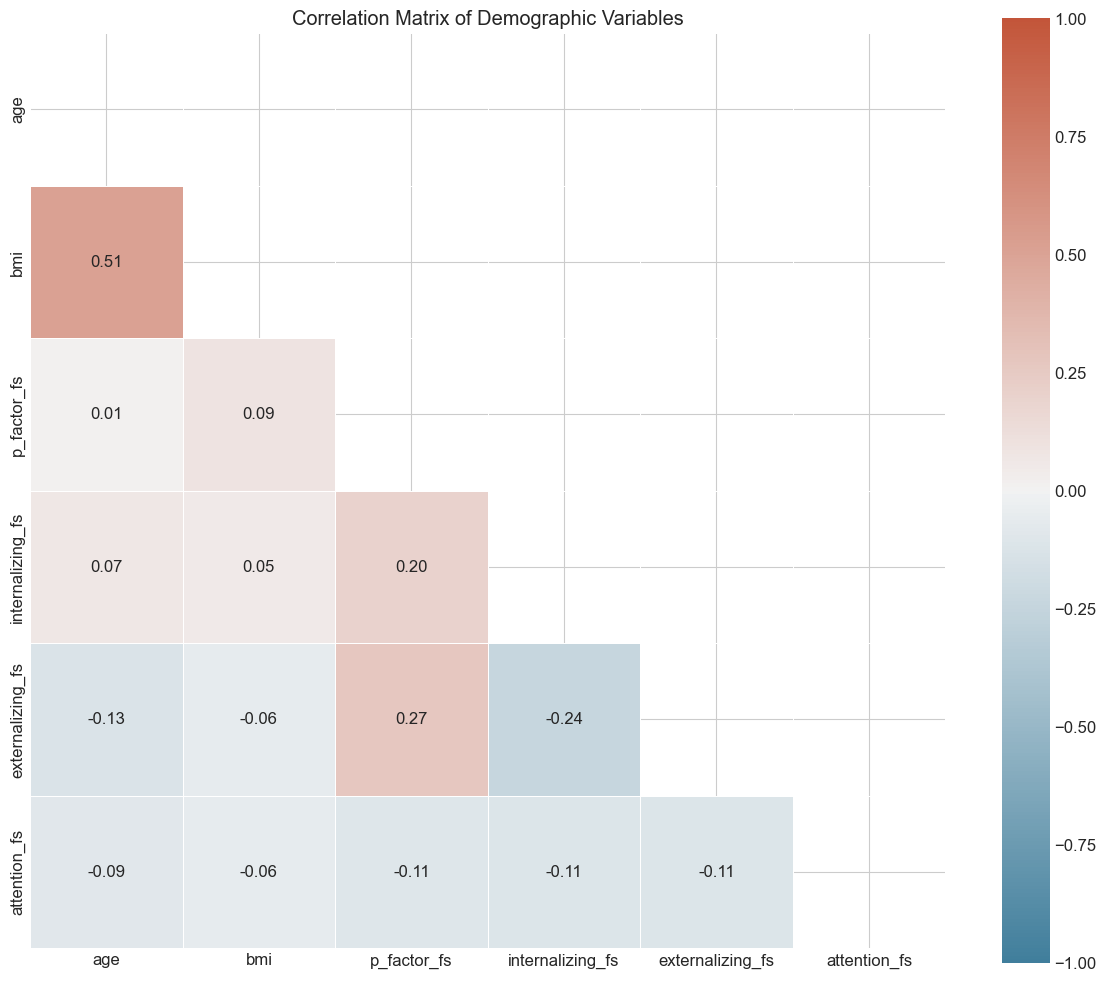

In [20]:
eda.demographic_correlation_heatmap()

Factor Scores and Correlation Analysis:

Analysis for p_factor_fs:
Correlation between p_factor_fs and mean correlation value: 0.0155, p-value: 0.6071


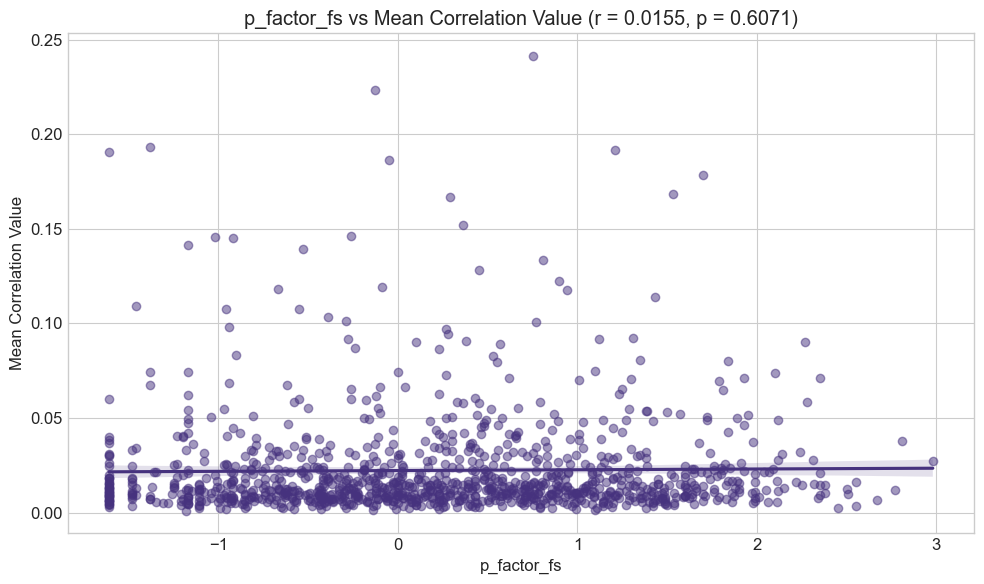

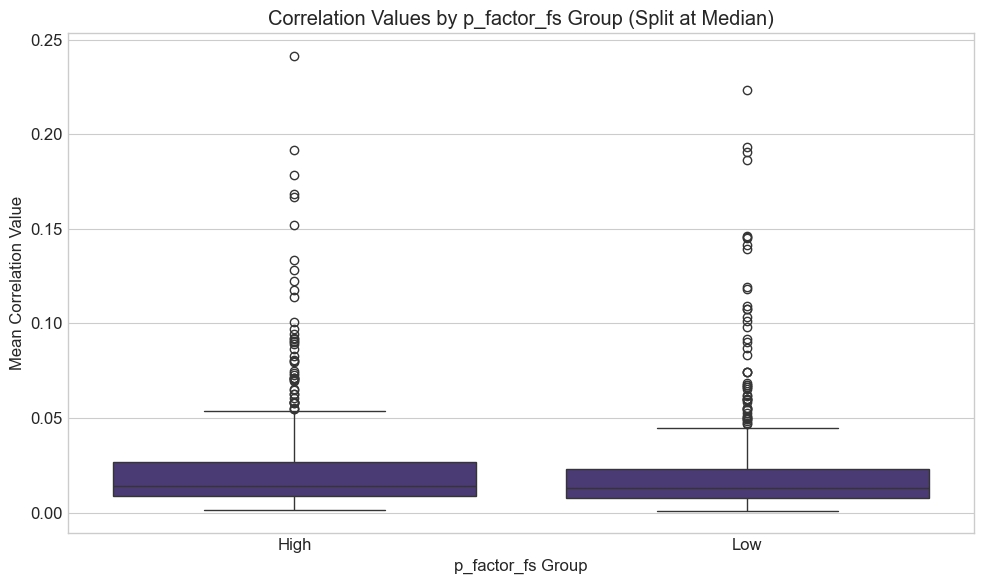

T-test between high and low p_factor_fs groups: t-statistic = 1.3119, p-value = 0.1898
The difference in correlation values between high and low p_factor_fs groups is not statistically significant (p >= 0.05).

Analysis for internalizing_fs:
Correlation between internalizing_fs and mean correlation value: -0.0452, p-value: 0.1335


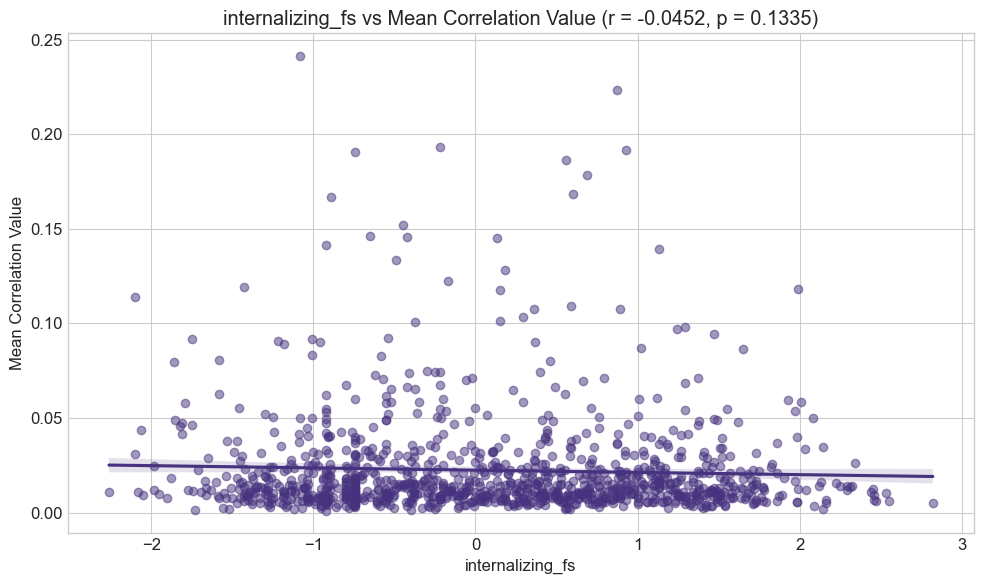

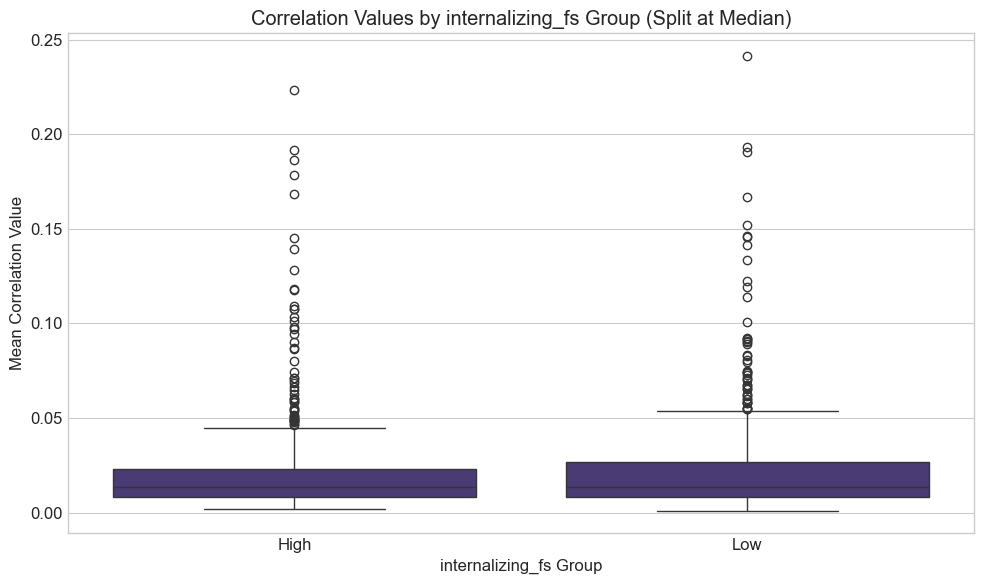

T-test between high and low internalizing_fs groups: t-statistic = -0.8929, p-value = 0.3721
The difference in correlation values between high and low internalizing_fs groups is not statistically significant (p >= 0.05).

Analysis for externalizing_fs:
Correlation between externalizing_fs and mean correlation value: 0.0334, p-value: 0.2669


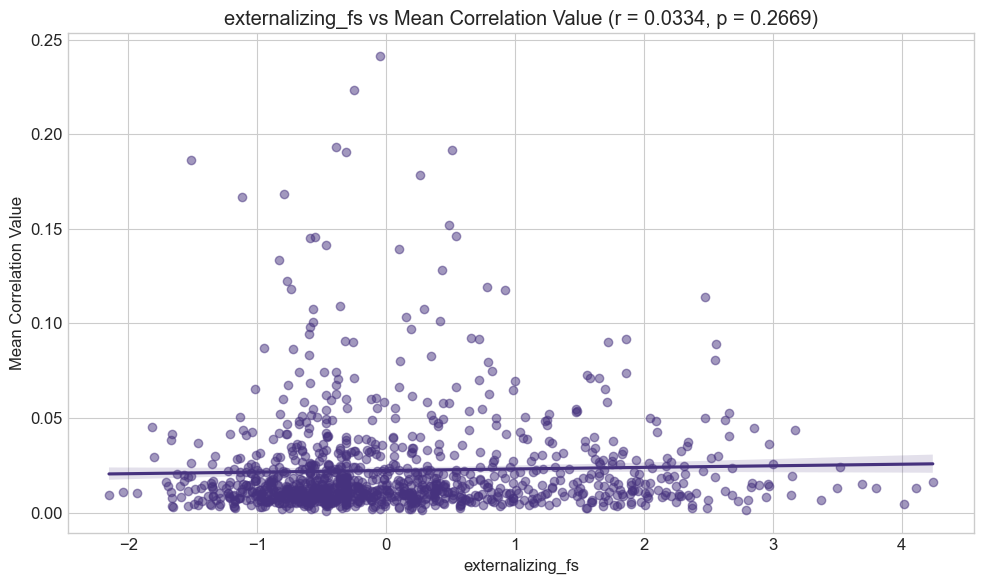

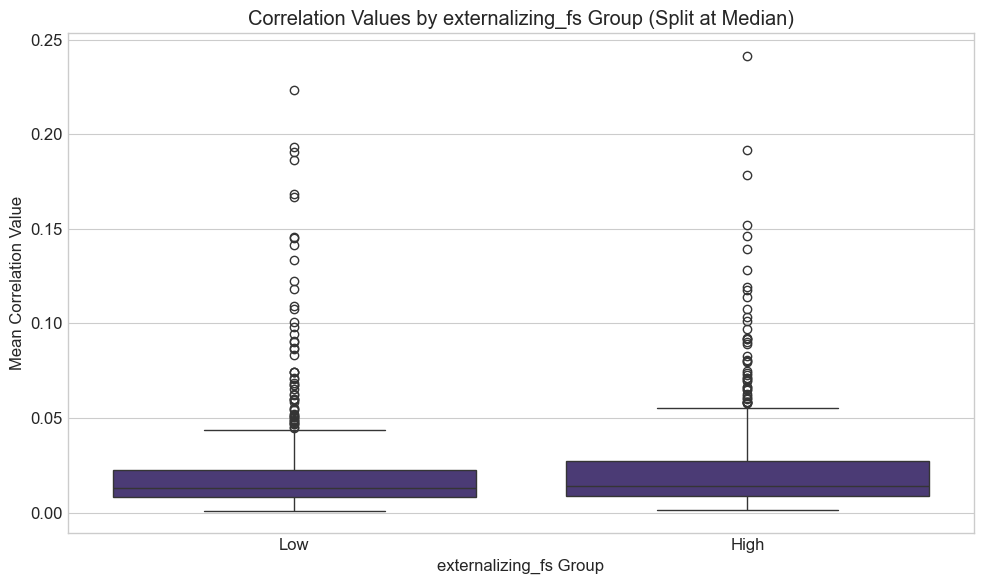

T-test between high and low externalizing_fs groups: t-statistic = 1.0121, p-value = 0.3117
The difference in correlation values between high and low externalizing_fs groups is not statistically significant (p >= 0.05).

Analysis for attention_fs:
Correlation between attention_fs and mean correlation value: 0.0581, p-value: 0.0535


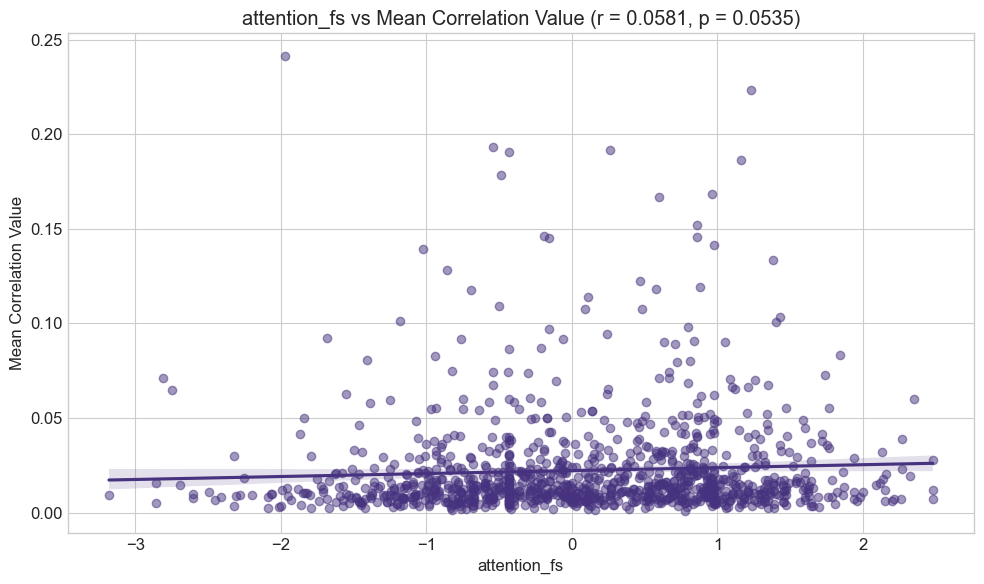

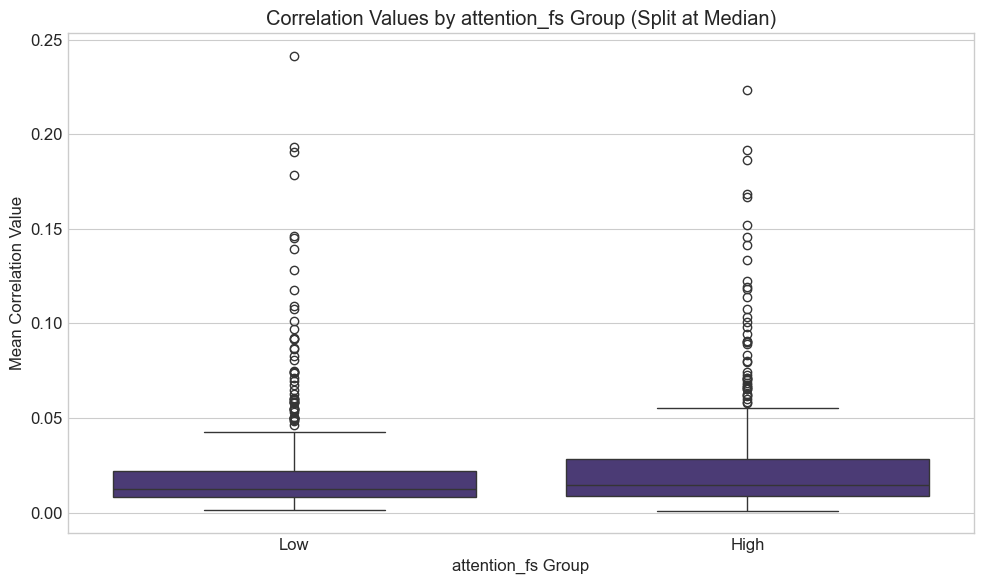

T-test between high and low attention_fs groups: t-statistic = 2.0123, p-value = 0.0444
The difference in correlation values between high and low attention_fs groups is statistically significant (p < 0.05).


In [21]:
eda.factor_scores_analysis()